Importing the necessary libraries

In [30]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.svm import SVC
import seaborn as sns
import requests
import pandas as pd
#import Fake_news_detection_dataset as FD
#import Fake_news_detection_dataset2 as FD2
import requests

Reading the train dataset

In [2]:
dataset = pd.read_csv('NewsArticles.csv',encoding='unicode escape')
dataset = dataset.drop(columns=['Unnamed: 0'])

Creating copy of train dataset

In [3]:
dataset_copy = dataset.copy()
dataset_copy = dataset_copy.sample(frac=1).reset_index(drop=True)
rows_to_drop = []
for i in range(0, dataset_copy.shape[0]):
    if(len(dataset_copy['Headlines'][i].split()) < 4):
        rows_to_drop.append(i)
dataset_copy = dataset_copy.drop(rows_to_drop)
dataset_copy = dataset_copy.reset_index(drop=True)

In [4]:
dataset_copy

,Headlines,Sources,Source_code
0,Pipeline panic is preview of CYBER TAKEDOWN of...,Survival News,Survival
1,Infosys share price hits new record high; stoc...,Financial Express,FE
2,"Fauci, Pfizer CEO, Big Tech Oligarchs, Chelsea...",News Punch,NP
3,COVID Vaccine Blood Clot Victims Demand Compen...,Great Game India,GGI
4,How Civilizations On Earth Will Function After...,All News Pipeline,ANP
...,...,...,...
14782,An App That Could Effectively Replace The Cont...,News Punch,NP
14783,"Lack of bus services, fleecing by autos hit wo...",Times of India,TOI
14784,Delhi govt moves HC against order allowing pri...,The Print,Print
14785,Ford's Electric F-150 Lightning Reservations P...,Zero Hedge,ZH


Downloading nltk dictionaries

In [5]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Lemmatizing the headlines in the train dataset




In [6]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
corpus = []
for i in range(0,len(dataset_copy)):
    message = re.sub('[^a-zA-Z0-9]', ' ', dataset_copy['Headlines'][i])
    message = message.lower()
    message = word_tokenize(message)
    message = [lemmatizer.lemmatize(w) for w in message if not w in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['pipeline panic preview cyber takedown u infrastructure', 'infosys share price hit new record high stock may rally 17 coming month', 'fauci pfizer ceo big tech oligarch chelsea clinton globalists speak vatican health conference', 'covid vaccine blood clot victim demand compensation u govt', 'civilization earth function great culling', 'u military troop deployed vaccinate american', 'pro trump candidate running new york mayor push amnesty', 'mumbai imd downgrade orange warning green heavy rainfall belt shift towards south konkan', 'year marriage haryana woman find husband ramesh muslim stage sit protest pressurised convert islam', 'pic hyundai alcazar booking open india see image design feature interior', 'karnataka hike electricity tariff opposition term decision disastrous', 'girl also suffered rohtak court dismisses appeal seeking action rohtak bravehearts falsely a

TF_IDF vectorization

In [7]:
tfidf_v = TfidfVectorizer(max_features=1000)
X = tfidf_v.fit_transform(corpus).toarray()

Feature scaling X. It is must in K means classification

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X

array([[-0.11452212, -0.1151749 , -0.07593262, ..., -0.04824973,
        -0.05130213, -0.04697492],
       [-0.11452212, -0.1151749 , -0.07593262, ..., -0.04824973,
        -0.05130213, -0.04697492],
       [-0.11452212, -0.1151749 , -0.07593262, ..., -0.04824973,
        -0.05130213, -0.04697492],
       ...,
       [-0.11452212, -0.1151749 , -0.07593262, ..., -0.04824973,
        -0.05130213, -0.04697492],
       [11.37109885, -0.1151749 , 17.20778041, ..., -0.04824973,
        -0.05130213, -0.04697492],
       [-0.11452212, -0.1151749 , -0.07593262, ..., -0.04824973,
        -0.05130213, -0.04697492]])

Performing PCA on dataset

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [11]:
pca_result

array([[-0.03103588, -0.3664342 ],
       [-0.08739222,  4.79553795],
       [-0.25290352,  0.34178066],
       ...,
       [-0.16109108, -2.40145327],
       [-0.05348848,  2.02164386],
       [-0.05953601,  0.50554678]])

Loading the saved model

In [12]:
filename = 'news_classifier_KMeans.sav'
loaded_model = pickle.load(open(filename, 'rb'))
clustered = loaded_model.predict(pca_result)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Making a copy of the train dataset along with Predictions column

In [13]:
dataset_predict = dataset_copy.copy()
dataset_predict['Prediction'] = clustered

In [14]:
dataset_predict

,Headlines,Sources,Source_code,Prediction
0,Pipeline panic is preview of CYBER TAKEDOWN of...,Survival News,Survival,0
1,Infosys share price hits new record high; stoc...,Financial Express,FE,4
2,"Fauci, Pfizer CEO, Big Tech Oligarchs, Chelsea...",News Punch,NP,3
3,COVID Vaccine Blood Clot Victims Demand Compen...,Great Game India,GGI,0
4,How Civilizations On Earth Will Function After...,All News Pipeline,ANP,0
...,...,...,...,...
14782,An App That Could Effectively Replace The Cont...,News Punch,NP,0
14783,"Lack of bus services, fleecing by autos hit wo...",Times of India,TOI,3
14784,Delhi govt moves HC against order allowing pri...,The Print,Print,5
14785,Ford's Electric F-150 Lightning Reservations P...,Zero Hedge,ZH,3


Getting the array of predictions

In [15]:
y_train = dataset_predict['Prediction']

Getting the test data using API keys

In [16]:
def test_data_newsdataio(df):
    query_params = {
       "apikey" : "YOUR API KEY",
        "domain" : "ndtv,indiatoday,indiatvnews,moneycontrol,toi"
    }
    main_url = "https://newsdata.io/api/1/news"
    res = requests.get(main_url, params=query_params)
    test_data = res.json()
    results = test_data['results']
    headline = []
    source = []
    for ar in results:
        headline.append(ar['title'])
        source.append(ar['source_id'])
    dict_1 = {'Headlines' : headline, 'Sources' : source}
    df1 = pd.DataFrame(dict_1)
    df = pd.concat([df,df1], ignore_index=True)
    df.reset_index()
    return df

def test_data_newsdataio_tie(df):
    query_params = {
       "apikey" : "YOUR API KEY",
        "domain" : "indianexpress"
    }
    main_url = "https://newsdata.io/api/1/news"
    res = requests.get(main_url, params=query_params)
    test_data = res.json()
    results = test_data['results']
    headline = []
    source = []
    for ar in results:
        headline.append(ar['title'])
        source.append(ar['source_id'])
    dict_1 = {'Headlines' : headline, 'Sources' : source}
    df1 = pd.DataFrame(dict_1)
    df = pd.concat([df,df1], ignore_index=True)
    df.reset_index()
    return df

test_dataset = pd.DataFrame.from_dict({'Headlines' : [], 'Sources' : []})

test_dataset = test_data_newsdataio(test_dataset)
test_dataset = test_data_newsdataio_tie(test_dataset)

In [17]:
test_dataset

,Headlines,Sources
0,PM Narendra Modi congratulates Indian archers ...,indiatvnews
1,"Samsung Galaxy M52 5G Camera Details Tipped, T...",ndtv
2,Dvara E-Dairy partners with IFFCO Tokio Genera...,moneycontrol
3,'Kumkum Bhagya' fame Zeeshan Khan reveals abou...,indiatvnews
4,Google rolls out two new features to Messages ...,toi
5,Huawei to Offer Software Support for Honor Pho...,ndtv
6,"AITA nominates Ankita Raina, Prajnesh for Arju...",indiatvnews
7,T20 World Cup to be held from October 17 to No...,toi
8,T20 World Cup to be held from Oct 17-Nov 14 in...,indiatvnews
9,Silver prices slide on dollar rebound; weaknes...,moneycontrol


Combining train and test datasets

In [19]:
dataset_copy_without_code = dataset_copy.drop(columns=['Source_code'])
dataset_copy_without_code = pd.concat([dataset_copy_without_code,test_dataset], ignore_index=True)
dataset_copy_without_code.reset_index()

,index,Headlines,Sources
0,0,Pipeline panic is preview of CYBER TAKEDOWN of...,Survival News
1,1,Infosys share price hits new record high; stoc...,Financial Express
2,2,"Fauci, Pfizer CEO, Big Tech Oligarchs, Chelsea...",News Punch
3,3,COVID Vaccine Blood Clot Victims Demand Compen...,Great Game India
4,4,How Civilizations On Earth Will Function After...,All News Pipeline
...,...,...,...
14802,14802,"Boy, 13, diagnosed with rare brain disease pos...",indianexpress
14803,14803,Vi launches Rs 99 and Rs 109 prepaid recharge ...,indianexpress
14804,14804,Shehnaaz Gill on losing weight: Only slim girl...,indianexpress
14805,14805,Esha Deol wishes husband Bharat Takhtani on we...,indianexpress


Getting corpus of the combined dataset

In [20]:
corpus = []
for i in range(0,len(dataset_copy_without_code)):
    message = re.sub('[^a-zA-Z0-9]', ' ', dataset_copy_without_code['Headlines'][i])
    message = message.lower()
    message = word_tokenize(message)
    message = [lemmatizer.lemmatize(w) for w in message if not w in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)

In [21]:
print(corpus)

['pipeline panic preview cyber takedown u infrastructure', 'infosys share price hit new record high stock may rally 17 coming month', 'fauci pfizer ceo big tech oligarch chelsea clinton globalists speak vatican health conference', 'covid vaccine blood clot victim demand compensation u govt', 'civilization earth function great culling', 'u military troop deployed vaccinate american', 'pro trump candidate running new york mayor push amnesty', 'mumbai imd downgrade orange warning green heavy rainfall belt shift towards south konkan', 'year marriage haryana woman find husband ramesh muslim stage sit protest pressurised convert islam', 'pic hyundai alcazar booking open india see image design feature interior', 'karnataka hike electricity tariff opposition term decision disastrous', 'girl also suffered rohtak court dismisses appeal seeking action rohtak bravehearts falsely accused 3 boy', 'dmk govt work getting official tag eighth schedule language say stalin', 'one indian railway oldest pun

Applying TF-IDF vectorization on combined dataset

In [22]:
tfidf_v = TfidfVectorizer(max_features=1000)
X_without_code = tfidf_v.fit_transform(corpus).toarray()

Feature Scaling of combined dataset

In [23]:
scaler = StandardScaler()
X_without_code = scaler.fit_transform(X_without_code)

PCA on combined dataset

In [24]:
pca_without_code = PCA(n_components=2)
pca_result_without_code = pca_without_code.fit_transform(X_without_code)

Splitting the PCA of test data from that of train data

In [25]:
pca_result_test = pca_result_without_code[14787:]

In [26]:
pca_result_test

array([[ 6.79664932e-02, -1.31402275e-01],
       [-2.33528926e-02,  2.33048577e+00],
       [ 3.79352389e-02, -8.22885692e-02],
       [-2.45428359e-01, -6.40000923e-01],
       [-1.82321693e-01,  1.28133110e+00],
       [ 4.81173937e+00,  2.86833934e-01],
       [-1.01188106e-02, -8.04535218e-02],
       [ 1.99433936e-01,  1.32377528e+00],
       [ 1.99433936e-01,  1.32377528e+00],
       [-4.40502740e-03,  8.88243332e+00],
       [-9.22644738e-02, -5.21598314e-01],
       [-1.66843094e-01,  7.59073920e-01],
       [ 1.99433936e-01,  1.32377528e+00],
       [-2.66195090e-02, -3.57013044e-01],
       [-1.58350989e-01, -4.01921438e-01],
       [-1.47958531e-01,  4.13402284e-01],
       [-1.06121255e-01,  7.28019796e-01],
       [-8.48920847e-02, -1.86005602e-01],
       [-9.84271051e-02,  5.34172182e-01],
       [-2.06302370e-01, -8.66784286e-01]])

Plotting K means cluster

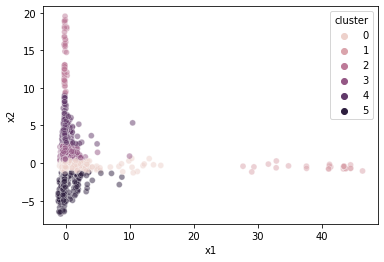

In [27]:
PCA_df = pd.DataFrame(pca_result)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']
k_means_figure = sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)

Creating dictionary of classifiers and their parameters

In [28]:
classifiers = {'LogRegress':LogisticRegression,'KNN':KNeighborsClassifier,'SVC':SVC,'NB':GaussianNB,'DT':DecisionTreeClassifier,'RF':RandomForestClassifier}

parameters = {
    'LogRegress':{'random_state':[0],'solver':['sag'],'max_iter':[100],'n_jobs':[-1]},
    'KNN':{'n_neighbors':[5,10,15],'p':[2],'metric':['minkowski'],'n_jobs':[-1]},
    'SVC':[{'C':[1,10,100,200,300],'random_state':[0],'gamma':['scale','auto',0.5,0.1,0.01,0.001,0.0001],'kernel':['rbf']},
           {'C':[1,10,100,200,300],'random_state':[0],'kernel':['linear']}],
    'DT':{'criterion':['gini','entropy'],'max_depth':[None,2,5,10,15],'min_samples_split':[2,3,4],'random_state':[0],'min_samples_leaf':[1,2,3]},
    'RF':{'n_estimators':[150,200,250],'criterion':['gini','entropy'],'max_depth':[5,10],'min_samples_split':[4,5],'random_state':[0],'min_samples_leaf':[2,3],'n_jobs':[-1]}
}

Testing of two of the classifiers using GridSearchCV

In [21]:
grid_search = GridSearchCV(estimator = classifiers['SVC'](),param_grid = [parameters['SVC'][0]],scoring = 'accuracy',cv=10,n_jobs=-1)
grid_search.fit(pca_result,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.82 %
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}


In [22]:
grid_search = GridSearchCV(estimator = classifiers['LogRegress'](),param_grid = [parameters['LogRegress']],scoring = 'accuracy',cv=10,n_jobs=-1)
grid_search.fit(pca_result,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.19 %
Best Parameters: {'max_iter': 100, 'n_jobs': -1, 'random_state': 0, 'solver': 'sag'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Creating a table of possible classifiers, their parameters and their accuracies


In [31]:
classifier_model = {'Classifier':[],'Possible_Parameters':[],'Confusion_Matrix':[],'Best_Accuracy':[],'Best_Parameters':[]}
for key1,value1 in classifiers.items():
    if (key1!='NB') and (key1!='SVC'):
        parameter = {}
        for key2,value2 in parameters.items():
            if(key1==key2):
                parameter = value2.copy()
        grid_search = GridSearchCV(estimator = value1(),param_grid = parameter,scoring = 'accuracy',cv=10,n_jobs=-1)
        grid_search.fit(pca_result,y_train)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        classifier = value1(**best_parameters)
        classifier.fit(pca_result,y_train)
        y_pred = classifier.predict(pca_result)
        cm = confusion_matrix(y_train,y_pred)
        classifier_model['Classifier'].append(key1)
        classifier_model['Possible_Parameters'].append(parameter)
        classifier_model['Confusion_Matrix'].append(cm)
        classifier_model['Best_Accuracy'].append(best_accuracy)
        classifier_model['Best_Parameters'].append(best_parameters)
        classifier_table = pd.DataFrame.from_dict(classifier_model)
    elif key1=='NB':
        classifier = value1()
        classifier.fit(pca_result,y_train)
        y_pred = classifier.predict(pca_result)
        cm = confusion_matrix(y_train,y_pred)
        classifier_model['Classifier'].append(key1)
        classifier_model['Possible_Parameters'].append('()')
        classifier_model['Confusion_Matrix'].append(cm)
        classifier_model['Best_Accuracy'].append(best_accuracy)
        classifier_model['Best_Parameters'].append('()')
    elif key1 == 'SVC':
        parameter_list = []
        for key2,value2 in parameters.items():
            if(key1==key2):
                parameter_list = value2.copy()
        grid_search = GridSearchCV(estimator = value1(),param_grid = parameter_list,scoring = 'accuracy',cv=10,n_jobs=-1)
        grid_search.fit(pca_result,y_train)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        classifier = value1(**best_parameters)
        classifier.fit(pca_result,y_train)
        y_pred = classifier.predict(pca_result)
        cm = confusion_matrix(y_train,y_pred)
        classifier_model['Classifier'].append(key1)
        classifier_model['Possible_Parameters'].append(parameter)
        classifier_model['Confusion_Matrix'].append(cm)
        classifier_model['Best_Accuracy'].append(best_accuracy)
        classifier_model['Best_Parameters'].append(best_parameters)
    print('Classifier :',key1 )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Classifier : LogRegress
Classifier : KNN
Classifier : SVC
Classifier : NB
Classifier : DT
Classifier : RF


In [32]:
classifier_table = pd.DataFrame.from_dict(classifier_model)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [33]:
classifier_table

,Classifier,Possible_Parameters,Confusion_Matrix,Best_Accuracy,Best_Parameters
0,LogRegress,"{'random_state': [0], 'solver': ['sag'], 'max_...","[[6861, 0, 0, 0, 0, 0], [0, 29, 0, 0, 0, 0], [...",0.991479,"{'max_iter': 100, 'n_jobs': -1, 'random_state'..."
1,KNN,"{'n_neighbors': [5, 10, 15], 'p': [2], 'metric...","[[6843, 0, 0, 8, 0, 10], [0, 29, 0, 0, 0, 0], ...",0.995334,"{'metric': 'minkowski', 'n_jobs': -1, 'n_neigh..."
2,SVC,"{'n_neighbors': [5, 10, 15], 'p': [2], 'metric...","[[6857, 0, 0, 4, 0, 0], [0, 29, 0, 0, 0, 0], [...",0.999391,"{'C': 300, 'kernel': 'linear', 'random_state': 0}"
3,NB,(),"[[6616, 19, 0, 181, 0, 45], [0, 29, 0, 0, 0, 0...",0.999391,()
4,DT,"{'criterion': ['gini', 'entropy'], 'max_depth'...","[[6861, 0, 0, 0, 0, 0], [0, 29, 0, 0, 0, 0], [...",0.998647,"{'criterion': 'gini', 'max_depth': None, 'min_..."
5,RF,"{'n_estimators': [150, 200, 250], 'criterion':...","[[6860, 0, 0, 0, 0, 1], [0, 29, 0, 0, 0, 0], [...",0.998512,"{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


From the table we find that SVC performs the best with 99.9 percent accuracy. So, we use SVC

Prediction of category of news headlines in test data using Support Vector Classifier

In [34]:
SVC_classifier = SVC(C=300,kernel='linear',random_state=0)
SVC_classifier.fit(pca_result,y_train)
clustered_test = SVC_classifier.predict(pca_result_test)

Creating a new test dataset with the predictions

In [35]:
dataset_test_predict = test_dataset.copy()
dataset_test_predict['Prediction'] = clustered_test
dataset_test_predict['Sources'][dataset_test_predict['Sources']=='indiatoday'] = 'India Today'
dataset_test_predict['Sources'][dataset_test_predict['Sources']=='ndtv'] = 'NDTV'
dataset_test_predict['Sources'][dataset_test_predict['Sources']=='indiatvnews'] = 'India TV'
dataset_test_predict['Sources'][dataset_test_predict['Sources']=='moneycontrol'] = 'Money Control'
dataset_test_predict['Sources'][dataset_test_predict['Sources']=='toi'] = 'Times of India'
dataset_test_predict['Sources'][dataset_test_predict['Sources']=='indianexpress'] = 'The Indian Express'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [36]:
dataset_test_predict

,Headlines,Sources,Prediction
0,PM Narendra Modi congratulates Indian archers ...,India TV,0
1,"Samsung Galaxy M52 5G Camera Details Tipped, T...",NDTV,3
2,Dvara E-Dairy partners with IFFCO Tokio Genera...,Money Control,0
3,'Kumkum Bhagya' fame Zeeshan Khan reveals abou...,India TV,0
4,Google rolls out two new features to Messages ...,Times of India,3
5,Huawei to Offer Software Support for Honor Pho...,NDTV,0
6,"AITA nominates Ankita Raina, Prajnesh for Arju...",India TV,0
7,T20 World Cup to be held from October 17 to No...,Times of India,3
8,T20 World Cup to be held from Oct 17-Nov 14 in...,India TV,3
9,Silver prices slide on dollar rebound; weaknes...,Money Control,4


code map for source

In [37]:
code_map = {'Op India':'OpIndia', 'Zero Hedge':'ZH', 'US Daily Info':'US_daily', 'News Punch':'NP',
                                                                    'News Target':'NT', 'The Epoch Times':'TET', 'Right Scoop':'RS', 'News Busters': 'NB',
                                                                    'Big League Politics':'BLP', 'Children Health Defense':'CHD', 'Breitbart':'Breitbart',
                                                                    'Info Wars':'IW', 'All News Pipeline':'ANP', 'Alt Market':'AM', 'True Pundit':'TP',
                                                                    'Survival News':'Survival', 'DC Clothes Line':'DCL', 'Great Game India':'GGI', 'Forward Observer': 'FO',
                                                                    'OANN':'OANN', 'The Post Millennial':'TPM', 'NDTV':'NDTV', 'The Quint':'Quint', 'The Print':'Print',
                                                                    'India Today':'IT', 'News 18':'News18', 'Times of India':'TOI', 'The Indian Express':'TIE', 'Money Control':'MC',
                                                                    'Financial Express':'FE', 'Republic World':'Republic', 'India TV':'IndiaTV'}


adding source code column to test dataset

In [38]:
source_code_test = []
for i in range(len(dataset_test_predict)):
    source_code_test.append(code_map[dataset_test_predict['Sources'][i]])
dataset_test_predict['Source_code'] = source_code_test

creating category column for both train and test dataset. Category column relabels the clusters with numbers in the order of increasing probability of non credibility

In [39]:
train_category = []
for i in range(0,len(dataset_predict)):
    if(dataset_predict['Prediction'][i]==2):
        train_category.append(1)
    elif(dataset_predict['Prediction'][i]==4):
        train_category.append(2)
    elif(dataset_predict['Prediction'][i] == 3):
        train_category.append(3)
    elif (dataset_predict['Prediction'][i] == 0):
        train_category.append(4)
    elif (dataset_predict['Prediction'][i] == 5):
        train_category.append(5)
    elif (dataset_predict['Prediction'][i] == 1):
        train_category.append(6)

test_category = []
for i in range(0,len(dataset_test_predict)):
    if(dataset_test_predict['Prediction'][i]==2):
        test_category.append(1)
    elif(dataset_test_predict['Prediction'][i]==4):
        test_category.append(2)
    elif(dataset_test_predict['Prediction'][i] == 3):
        test_category.append(3)
    elif (dataset_test_predict['Prediction'][i] == 0):
        test_category.append(4)
    elif (dataset_test_predict['Prediction'][i] == 5):
        test_category.append(5)
    elif (dataset_test_predict['Prediction'][i] == 1):
        test_category.append(6)

dataset_predict['Category'] = train_category
dataset_test_predict['Category'] = test_category

In [42]:
dataset_predict.head()

,Headlines,Sources,Source_code,Prediction,Category
0,Pipeline panic is preview of CYBER TAKEDOWN of...,Survival News,Survival,0,4
1,Infosys share price hits new record high; stoc...,Financial Express,FE,4,2
2,"Fauci, Pfizer CEO, Big Tech Oligarchs, Chelsea...",News Punch,NP,3,3
3,COVID Vaccine Blood Clot Victims Demand Compen...,Great Game India,GGI,0,4
4,How Civilizations On Earth Will Function After...,All News Pipeline,ANP,0,4


In [43]:
dataset_test_predict

,Headlines,Sources,Prediction,Source_code,Category
0,PM Narendra Modi congratulates Indian archers ...,India TV,0,IndiaTV,4
1,"Samsung Galaxy M52 5G Camera Details Tipped, T...",NDTV,3,NDTV,3
2,Dvara E-Dairy partners with IFFCO Tokio Genera...,Money Control,0,MC,4
3,'Kumkum Bhagya' fame Zeeshan Khan reveals abou...,India TV,0,IndiaTV,4
4,Google rolls out two new features to Messages ...,Times of India,3,TOI,3
5,Huawei to Offer Software Support for Honor Pho...,NDTV,0,NDTV,4
6,"AITA nominates Ankita Raina, Prajnesh for Arju...",India TV,0,IndiaTV,4
7,T20 World Cup to be held from October 17 to No...,Times of India,3,TOI,3
8,T20 World Cup to be held from Oct 17-Nov 14 in...,India TV,3,IndiaTV,3
9,Silver prices slide on dollar rebound; weaknes...,Money Control,4,MC,2


saving datasets

In [44]:
dataset_predict.to_csv('dataset_predict.csv')
dataset_test_predict.to_csv('dataset_test_predict.csv')